### Coding with Qiskit Episode 8

# Noise and Measurement Error Mitigation

#### Written by Abraham Asfaw, IBM TJ Watson Research Center

In this episode of Coding with Qiskit, we learned about noise, and saw how it affects quantum computation on real devices by introducing errors.

To learn more about measurement error mitigation, check out [the section in our open-source Qiskit textbook on this topic](https://community.qiskit.org/textbook/ch-quantum-hardware/measurement-error-mitigation.html).

**Link to Episode 8:** https://youtu.be/yuDxHJOKsVA

In [1]:
from IPython.display import IFrame
IFrame(src="http://www.youtube.com/embed/yuDxHJOKsVA", width=1920/2, height=1080/2)

# Building a simple quantum circuit

In [2]:
from qiskit import *

In [3]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

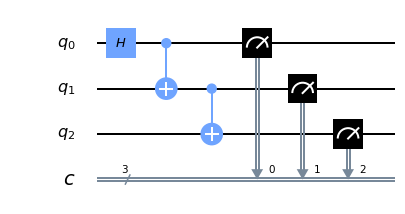

In [4]:
circuit.draw(output='mpl')

# Simulating the quantum circuit

In [5]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend=simulator, shots=1024).result()

In [6]:
from qiskit.visualization import plot_histogram

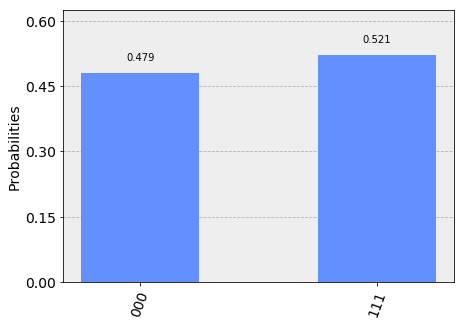

In [7]:
plot_histogram(sim_result.get_counts(circuit))

# Running the quantum circuit on a real quantum computer

In [8]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmqx2')

In [9]:
job = execute(circuit, backend=device, shots=1024)
#print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


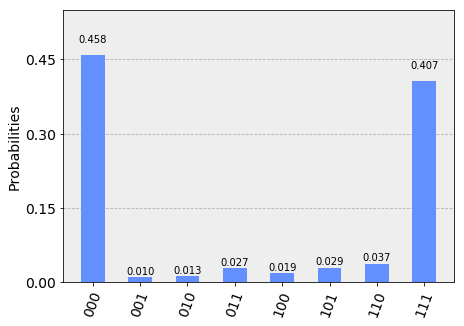

In [10]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

# Calibrating measurement errors using Qiskit Ignis

In [11]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [12]:
cal_circuits, state_labels = complete_meas_cal(qr=circuit.qregs[0], 
                                               circlabel='measurement_calibration')

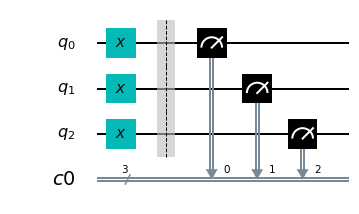

In [13]:
cal_circuits[7].draw(output='mpl')

In [14]:
len(cal_circuits)

8

In [15]:
cal_job = execute(cal_circuits,
             backend=device,
             shots=8192,
             optimization_level=0)
#print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

Job Status: job has successfully run


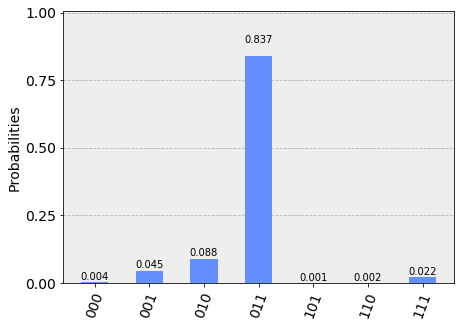

In [16]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))

### Creating the Measurement Fitter Object in Ignis 

In [17]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

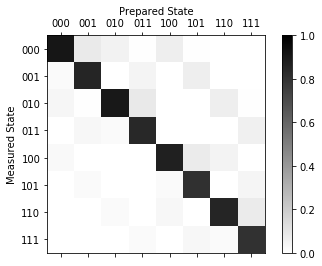

In [18]:
meas_fitter.plot_calibration()

In [19]:
meas_filter = meas_fitter.filter

# Mitigating the measurement errors in our previous device run

In [20]:
mitigated_result = meas_filter.apply(device_result)

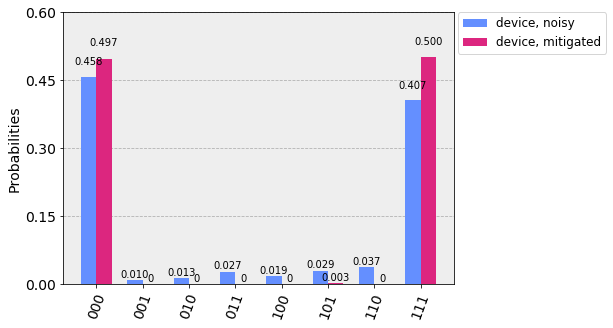

In [21]:
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], 
               legend=['device, noisy', 'device, mitigated'])

# Running error mitigation on a second circuit

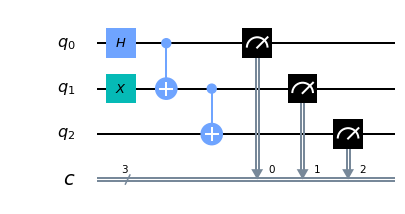

In [22]:
circuit2 = QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2], [0,1,2])
circuit2.draw(output='mpl')

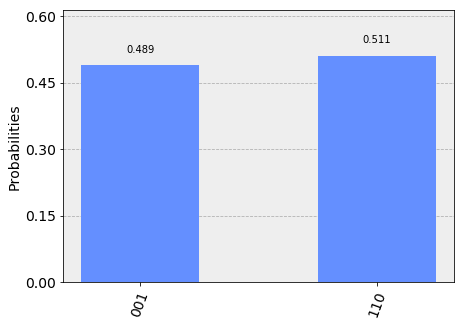

In [23]:
plot_histogram(
    execute(circuit2, backend=simulator, shots=1024).result().get_counts(circuit2)
)

In [24]:
device_counts_2 = execute(circuit2, backend=device, shots=1024).result().get_counts(circuit2)

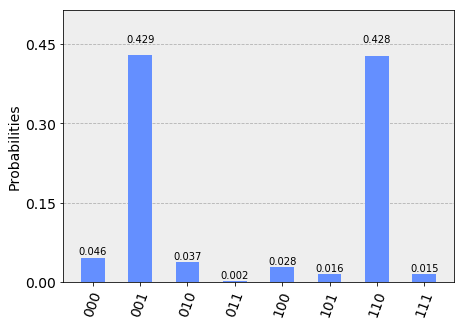

In [25]:
plot_histogram(device_counts_2)

In [26]:
mitigated_counts_2 = meas_filter.apply(device_counts_2)

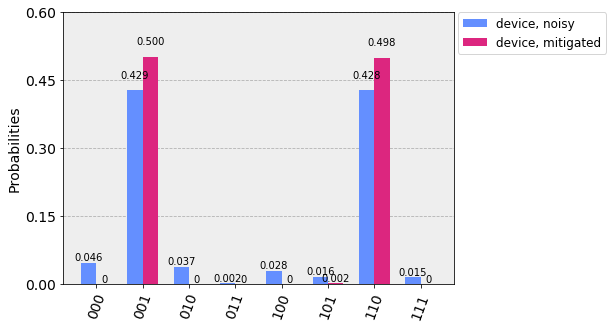

In [27]:
plot_histogram([device_counts_2, mitigated_counts_2], legend=['device, noisy','device, mitigated'])

# References

#### Tutorials
For detailed information about Qiskit, check out the tutorials in the Github repository:

https://github.com/Qiskit/qiskit-iqx-tutorials

For a pedagogical presentation of the mathematics behind the Bernstein-Vazirani algorithm, check out our open-source `Learn Quantum Computation using Qiskit` textbook:

https://community.qiskit.org/textbook/

# Version

It's good to note the Qiskit version that was used in your work. One way to do this is print the version at the bottom of the Jupyter notebook using

In [28]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.9.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-aqua': '0.6.0',
 'qiskit': '0.12.0',
 'qiskit-aer': '0.3.0',
 'qiskit-ibmq-provider': '0.3.2'}

In [29]:
import qiskit.tools.jupyter
%qiskit_copyright